#### Topic Modeling on Article data

In [60]:
import pandas as pd
import numpy as np

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
content = pd.read_csv('../data/platform_content.csv')

In [63]:
content.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


Remove all docs that are not in English

In [64]:
content.language.value_counts()

en    2264
pt     850
la       4
es       2
ja       2
Name: language, dtype: int64

In [65]:
content.shape

(3122, 13)

In [66]:
content = content[content['language'] == 'en']

In [67]:
content.shape

(2264, 13)

In [68]:
no_dups = content.sort_values('event_timestamp').drop_duplicates(subset=['title', 'text_description'], keep='last')

In [69]:
no_dups.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,content_present,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en


In [70]:
no_dups.reset_index(inplace=True)

In [71]:
no_dups.interaction_type.value_counts()

content_present       2153
content_pulled_out      38
Name: interaction_type, dtype: int64

In [72]:
no_dups[no_dups['title'] == "Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"]

,index,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en


In [73]:
content[content['title'] == "Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"]

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en


Makes sense

In [74]:
content = no_dups

Drop everything except the text.

In [75]:
trimmed = content[['title', 'text_description', 'interaction_type']]

In [76]:
trimmed.head()

,title,text_description,interaction_type
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,content_present
1,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,content_present
2,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,content_present
3,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,content_present
4,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,content_present


Preprocessing

In [77]:
trimmed['text_no_punc'] = trimmed.text_description.str.replace(r'[^\w\s]+', '')

In [78]:
trimmed.head()

,title,text_description,interaction_type,text_no_punc
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,content_present,All of this work is still very early The first...
1,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,content_present,The alarm clock wakes me at 800 with stream of...
2,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,content_present,Were excited to share the Google Data Center 3...
3,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,content_present,The Aite Group projects the blockchain market ...
4,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,content_present,One of the largest and oldest organizations fo...


In [79]:
# Convert trimmed.text_no_punc to lowercase and assign to trimmed.text_no_punc_lower
trimmed['text_no_punc_lower'] = trimmed.text_no_punc.str.lower()

In [80]:
trimmed.head()

,title,text_description,interaction_type,text_no_punc,text_no_punc_lower
0,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,content_present,All of this work is still very early The first...,all of this work is still very early the first...
1,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,content_present,The alarm clock wakes me at 800 with stream of...,the alarm clock wakes me at 800 with stream of...
2,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,content_present,Were excited to share the Google Data Center 3...,were excited to share the google data center 3...
3,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,content_present,The Aite Group projects the blockchain market ...,the aite group projects the blockchain market ...
4,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,content_present,One of the largest and oldest organizations fo...,one of the largest and oldest organizations fo...


#### Build a WordCloud

In [81]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [82]:
from wordcloud import WordCloud

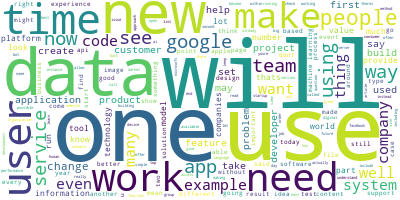

In [83]:
# Create a wordcloud of trimmed.text_no_punc_lower
long_string = ','.join(trimmed.text_no_punc_lower)
wc = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='steelblue')
wc.generate(long_string)
wc.to_image()

#### Prepare the data for LDA

In [84]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [85]:
import gensim
from gensim.utils import simple_preprocess

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksrs9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
stopwords_en = stopwords.words('english')

In [87]:
# Define a function to convert sentences to words using gensim's simple_preprocess
def sentences_to_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))

# define a function to remove stopwords
# def remove_stopwords(words):
    # return [w for w in words if w not in stopwords_en]

In [88]:
# Define a function to remove stopwords using gensim's simple_preprocess
def remove_stopwords(docs):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords_en] for doc in docs]

In [89]:
data = trimmed.text_description.values.tolist()
data_words = list(sentences_to_words(data))

In [90]:
# Create bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['all', 'of', 'this', 'work', 'is', 'still', 'very', 'early', 'the', 'first', 'full', 'public', 'version', 'of', 'the', 'ethereum', 'software', 'was', 'recently', 'released', 'and', 'the', 'system', 'could', 'face', 'some', 'of', 'the', 'same', 'technical', 'and', 'legal', 'problems', 'that', 'have', 'tarnished', 'bitcoin', 'many', 'bitcoin', 'advocates', 'say', 'ethereum', 'will', 'face', 'more', 'security', 'problems', 'than', 'bitcoin', 'because', 'of', 'the', 'greater', 'complexity', 'of', 'the', 'software', 'thus', 'far', 'ethereum', 'has', 'faced', 'much', 'less', 'testing', 'and', 'many', 'fewer', 'attacks', 'than', 'bitcoin', 'the', 'novel', 'design', 'of', 'ethereum', 'may', 'also', 'invite', 'intense', 'scrutiny', 'by', 'authorities', 'given', 'that', 'potentially', 'fraudulent', 'contracts', 'like', 'the', 'ponzi', 'schemes', 'can', 'be', 'written', 'directly', 'into', 'the', 'ethereum', 'system', 'but', 'the', 'sophisticated', 'capabilities', 'of', 'the', 'system', 'have', 

In [91]:
# Define a function to make bigrams
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [92]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [93]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [94]:
# Define a function to lemmatize given texts
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [95]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)

In [96]:
# sentences = trimmed.text_description.values.tolist()

In [97]:
# words_array = list(sentences_to_words(sentences))

In [98]:
# words_array[0]

In [99]:
# no_stopwords = [remove_stopwords(words) for words in words_array]

In [100]:
# no_stopwords[0]

Build a Dictionary

In [101]:
from gensim.corpora import Dictionary

data_dictionary = Dictionary(data_lemmatized)
corpus = [data_dictionary.doc2bow(word_arr) for word_arr in data_lemmatized]

In [102]:
# data_dictionary.doc2bow(words[0])
# len(words[0])
# words[0][13]

In [103]:
# corpus[0]

In [131]:
# num_topics = 20

In [133]:
update_every = [1, 2, 5, 10]
chunksize = [10, 20, 25, 50, 75, 100]
passes = [1, 2, 5, 10]
num_topics = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [134]:
import itertools

In [136]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=['update_every', 'chunksize', 'passes', 'num_topics', 'perplexity', 'coherence'])

In [135]:
for x in itertools.product(update_every, chunksize, passes, num_topics):
    (ue, cs, p, nt) = x
    lda_model = gensim.models.ldamodel.LdaModel(
        corpus=corpus, 
        id2word=data_dictionary, 
        random_state=42, 
        alpha='auto', 
        eta='auto',
        num_topics=nt, 
        update_every=ue, 
        chunksize=cs, 
        passes=p, 
        per_word_topics=True
    )
    
    # Compute Perplexity
    perplexity = lda_model.log_perplexity(corpus)

    # Compute Coherence Score
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=data_dictionary, coherence='c_v')
    coherence = coherence_model_lda.get_coherence()

    results = results.append({'update_every': ue, 'chunksize': cs, 'passes': p, 'num_topics': nt, 'perplexity': perplexity, 'coherence': coherence}, ignore_index=True)

(1, 10, 1, 5)


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus, 
    id2word=data_dictionary, 
    num_topics=num_topics, 
    random_state=42, 
    update_every=1, 
    chunksize=50, 
    passes=10, 
    alpha='auto', 
    eta='auto',
    per_word_topics=True
)

In [129]:
# from pprint import pprint
# pprint(lda_model.print_topics())
lda_model.print_topics()

[(0,
  '0.017*"use" + 0.012*"application" + 0.012*"service" + 0.009*"api" + 0.008*"developer" + 0.008*"new" + 0.007*"code" + 0.007*"also" + 0.007*"support" + 0.007*"build"'),
 (1,
  '0.021*"cloud" + 0.019*"event" + 0.012*"service" + 0.010*"work" + 0.010*"evernote" + 0.010*"system" + 0.009*"domain" + 0.008*"microservice" + 0.008*"datum" + 0.008*"use"'),
 (2,
  '0.028*"use" + 0.022*"code" + 0.020*"event" + 0.016*"method" + 0.014*"view" + 0.012*"file" + 0.011*"list" + 0.010*"java" + 0.010*"stream" + 0.009*"call"'),
 (3,
  '0.010*"use" + 0.009*"get" + 0.008*"search" + 0.007*"good" + 0.007*"site" + 0.006*"make" + 0.006*"people" + 0.006*"page" + 0.006*"year" + 0.006*"time"'),
 (4,
  '0.009*"say" + 0.009*"new" + 0.007*"company" + 0.006*"year" + 0.006*"make" + 0.005*"device" + 0.005*"apple" + 0.005*"see" + 0.005*"get" + 0.004*"consumer"'),
 (5,
  '0.019*"customer" + 0.016*"company" + 0.010*"business" + 0.009*"new" + 0.009*"digital" + 0.008*"technology" + 0.007*"experience" + 0.007*"service" + 

In [ ]:
doc_lda = lda_model[corpus]

Evaluation

In [130]:
lda_model.log_perplexity(corpus)

-8.046143342868547

In [ ]:
doc_lda

In [ ]:
doc_lda[0]

In [ ]:
lda_model.get_document_topics(corpus[0], minimum_probability=0.01)

In [ ]:
lda_model.show_topic(0)

In [ ]:
all_topics = lda_model.get_document_topics(corpus, minimum_probability=0.01)

In [ ]:
all_topics_matrix = gensim.matutils.corpus2csc(all_topics)

In [ ]:
all_topics_matrix

Matrix is 10 X 3026, meaning it has one row for each topic, and one column for each item.

So take the transpose

In [ ]:
all_topics_arr = all_topics_matrix.T.toarray()

In [ ]:
all_topics_df = pd.DataFrame(all_topics_arr)

In [ ]:
all_topics_df.head()

In [ ]:
all_topics_df[1].value_counts()

Squashing the topics into a single list

In [ ]:
for idx, row in enumerate(lda_model[corpus]):
    print(idx, row)
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    print(row)

    # Extract the first item from each tuple in row
    topic_indices = [x[0] for x in row]

    # print(lda_model.show_topic(row[0][0]))
    print(topic_indices)
    break

In [ ]:
def get_topic_indices(row):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    topic_indices = [x[0] for x in row]
    return topic_indices

In [ ]:
# Map the get_topic_indices function to lda_model[corpus]
topic_indices = list(map(get_topic_indices, lda_model[corpus]))

In [ ]:
topic_indices[0]

In [ ]:
# Convert topic_indices to a Series, and convert the Series into a DataFrame
topic_indices_df = pd.DataFrame(pd.Series(topic_indices))

In [ ]:
topic_indices_df.head()

In [ ]:
# Concatenate trimmed and topic_indices_df
trimmed_topics = pd.concat([trimmed, topic_indices_df], axis=1)

In [ ]:
trimmed_topics.head()

In [ ]:
# Rename the column in trimmed_topics
trimmed_topics = trimmed_topics.rename(columns={0: 'topic_indices'})

In [ ]:
trimmed_topics.head()

In [ ]:
lda_model.print_topics()

In [ ]:
def get_topic_names_from_index(idx):
    if idx == 0:
        return ['Customer Service', 'Technology', 'Business']
    if idx == 1:
        return ['Encryption', 'Technology', 'Digital Security', 'Computer Science']
    if idx == 2:
        return ['Programming', 'API', 'Java', 'Technology']
    if idx == 3:
        return ['Cloud', 'AWS', 'Amazon Web Services', 'Internet', 'Technology']
    if idx == 4:
        return ['Teams', 'People', 'Office']
    if idx == 5:
        return ['Mobiles', 'Technology', 'Android', 'IOS', 'Apple', 'Google']
    if idx == 6:
        return ['Cloud', 'AWS', 'Amazon Web Services', 'Internet']
    if idx == 7:
        return ['Cloud', 'AWS', 'Amazon Web Services', 'Internet']
    if idx == 8:
        return ['Cloud', 'AWS', 'Amazon Web Services', 'Internet']
    if idx == 9:
        return ['Cloud', 'AWS', 'Amazon Web Services', 'Internet']
    return []

def get_topic_names(row):
    topic_names = [get_topic_names_from_index(idx) for idx in row]
    flat = [item for sublist in topic_names for item in sublist]
    return list(set(flat))

In [ ]:
# Drop text_no_punc and text_no_punc_lower from trimmed_topics
trimmed_topics = trimmed_topics.drop(['text_no_punc', 'text_no_punc_lower'], axis=1)

In [ ]:
trimmed_topics.head()

In [ ]:
# Iterate over the topic_indices column in trimmed_topics and apply get_topic_names_from_index
trimmed_topics['topic_names'] = trimmed_topics['topic_indices'].apply(lambda x: get_topic_names(x))

In [ ]:
trimmed_topics.head()

In [ ]:
# Drop topic_indices from trimmed_topics
trimmed_topics = trimmed_topics.drop('topic_indices', axis=1)

In [ ]:
trimmed_topics.head()

In [ ]:
trimmed_topics['topic_names']

In [ ]:
# Add the topic_names column to content
content = pd.concat([content, trimmed_topics['topic_names']], axis=1)

In [ ]:
content.head()

In [ ]:
trimmed.shape

In [ ]:
y.shape

In [ ]:
# x.columns

In [ ]:
trimmed.shape

In [ ]:
dups = trimmed[trimmed.duplicated(subset=['title', 'text_description'])]

In [ ]:
dups.head(20)